# Read Dataset<a href="#Read-Dataset" class="anchor-link">¶</a>

In \[25\]:

    import pandas as pd
    from warnings import filterwarnings
    filterwarnings("ignore")

    trd = pd.read_csv("Desktop/Projects/Loan/training_set.csv")
    tsd = pd.read_csv("Desktop/Projects/Loan/testing_set.csv")

In \[26\]:

    trd.head(2)

Out\[26\]:

|     | Loan_ID  | Gender | Married | Dependents | Education | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|-----------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | LP001002 | Male   | No      | 0          | Graduate  | No            | 5849.0          | 0.0               | NaN        | 360.0            | 1.0            | Urban         | Y           |
| 1   | LP001003 | Male   | Yes     | 1          | Graduate  | No            | NaN             | 1508.0            | 128.0      | 360.0            | 1.0            | Rural         | N           |

In \[27\]:

    tsd.head(2)

Out\[27\]:

|     | Loan_ID  | Gender | Married | Dependents | Education | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area |
|-----|----------|--------|---------|------------|-----------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|
| 0   | LP001015 | Male   | Yes     | 0          | Graduate  | No            | 5720            | 0                 | 110.0      | 360.0            | 1.0            | Urban         |
| 1   | LP001022 | Male   | Yes     | 1          | Graduate  | No            | 3076            | 1500              | 126.0      | 360.0            | 1.0            | Urban         |

# Profiling<a href="#Profiling" class="anchor-link">¶</a>

In \[28\]:

    trd.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 614 entries, 0 to 613
    Data columns (total 13 columns):
    Loan_ID              614 non-null object
    Gender               599 non-null object
    Married              611 non-null object
    Dependents           599 non-null object
    Education            613 non-null object
    Self_Employed        582 non-null object
    ApplicantIncome      612 non-null float64
    CoapplicantIncome    613 non-null float64
    LoanAmount           592 non-null float64
    Loan_Amount_Term     600 non-null float64
    Credit_History       564 non-null float64
    Property_Area        614 non-null object
    Loan_Status          614 non-null object
    dtypes: float64(5), object(8)
    memory usage: 62.4+ KB

In \[29\]:

    Q = trd.nunique().sort_values()
    Q1 = list(Q[Q<11].index)

In \[30\]:

    trd[Q1].head()

Out\[30\]:

|     | Gender | Married | Education    | Self_Employed | Credit_History | Loan_Status | Property_Area | Dependents | Loan_Amount_Term |
|-----|--------|---------|--------------|---------------|----------------|-------------|---------------|------------|------------------|
| 0   | Male   | No      | Graduate     | No            | 1.0            | Y           | Urban         | 0          | 360.0            |
| 1   | Male   | Yes     | Graduate     | No            | 1.0            | N           | Rural         | 1          | 360.0            |
| 2   | Male   | Yes     | Graduate     | Yes           | 1.0            | Y           | Urban         | 0          | 360.0            |
| 3   | Male   | Yes     | Not Graduate | No            | 1.0            | Y           | Urban         | 0          | 360.0            |
| 4   | Male   | No      | Graduate     | No            | 1.0            | Y           | Urban         | 0          | 360.0            |

# Missing Data treatment<a href="#Missing-Data-treatment" class="anchor-link">¶</a>

In \[31\]:

    Q = trd.isna().sum()
    Q[Q>0]

Out\[31\]:

    Gender               15
    Married               3
    Dependents           15
    Education             1
    Self_Employed        32
    ApplicantIncome       2
    CoapplicantIncome     1
    LoanAmount           22
    Loan_Amount_Term     14
    Credit_History       50
    dtype: int64

In \[32\]:

    Q = tsd.isna().sum()
    Q[Q>0]

Out\[32\]:

    Gender              11
    Dependents          10
    Self_Employed       23
    LoanAmount           5
    Loan_Amount_Term     6
    Credit_History      29
    dtype: int64

In \[33\]:

    cat = []
    con = []
    for i in trd.columns:
        if(trd[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
        

In \[34\]:

    cat

Out\[34\]:

    ['Loan_ID',
     'Gender',
     'Married',
     'Dependents',
     'Education',
     'Self_Employed',
     'Property_Area',
     'Loan_Status']

In \[35\]:

    con

Out\[35\]:

    ['ApplicantIncome',
     'CoapplicantIncome',
     'LoanAmount',
     'Loan_Amount_Term',
     'Credit_History']

In \[36\]:

    trd[cat].nunique()

Out\[36\]:

    Loan_ID          614
    Gender             2
    Married            2
    Dependents         4
    Education          2
    Self_Employed      2
    Property_Area      3
    Loan_Status        2
    dtype: int64

In \[37\]:

    trd[con].nunique()

Out\[37\]:

    ApplicantIncome      504
    CoapplicantIncome    286
    LoanAmount           203
    Loan_Amount_Term      10
    Credit_History         2
    dtype: int64

In \[38\]:

    con.remove("Credit_History")
    cat.append("Credit_History")

In \[39\]:

    for i in con:
        x = trd[i].mean()
        trd[i]=trd[i].fillna(x)
        tsd[i]=tsd[i].fillna(x)

In \[40\]:

    for i in cat:
        x = trd[i].mode()[0]
        trd[i]=trd[i].fillna(x)
        if(i!="Loan_Status"):
            tsd[i]=tsd[i].fillna(x)

In \[41\]:

    Q = trd.isna().sum()
    Q[Q>0]

Out\[41\]:

    Series([], dtype: int64)

In \[42\]:

    Q = tsd.isna().sum()
    Q[Q>0]

Out\[42\]:

    Series([], dtype: int64)

# Outliers<a href="#Outliers" class="anchor-link">¶</a>

In \[43\]:

    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    Q = pd.DataFrame(ss.fit_transform(trd[con]),columns=con)

In \[44\]:

    out = []
    for i in con:
        out = out + list(Q[(Q[i]>3)|(Q[i]<-3)].index)

In \[45\]:

    from numpy import unique
    outliers = list(unique(out))

In \[46\]:

    trd = trd.drop(index=outliers,axis=0)

In \[47\]:

    trd.shape

Out\[47\]:

    (577, 13)

In \[48\]:

    trd.index = range(0,577,1)

# EDA<a href="#EDA" class="anchor-link">¶</a>

In \[50\]:

    def ANOVA(df,cat,con):
        from statsmodels.formula.api import ols
        eqn = str(con) + " ~ " + str(cat)
        model = ols(eqn,df).fit()
        from statsmodels.stats.anova import anova_lm
        Q = anova_lm(model)
        return round(Q.iloc[0:1,4:5].values[0][0],5)

    def chisq(df,cat1,cat2):
        import pandas as pd
        from scipy.stats import chi2_contingency
        ct = pd.crosstab(df[cat1],df[cat2])
        a,b,c,d = chi2_contingency(ct)
        return round(b,5)

In \[51\]:

    for i in con:
        pval = ANOVA(trd,'Loan_Status',i)
        print("Loan_Status vs",i,"-----> pval =",pval)

    Loan_Status vs ApplicantIncome -----> pval = 0.89434
    Loan_Status vs CoapplicantIncome -----> pval = 0.28206
    Loan_Status vs LoanAmount -----> pval = 0.3975
    Loan_Status vs Loan_Amount_Term -----> pval = 0.66362

In \[52\]:

    for i in cat:
        pval = chisq(trd,'Loan_Status',i)
        if(pval<0.05 and i!='Loan_Status'):
            print("Loan_Status vs",i,"-----> pval =",pval)

    Loan_Status vs Married -----> pval = 0.04094
    Loan_Status vs Education -----> pval = 0.03415
    Loan_Status vs Property_Area -----> pval = 0.00232
    Loan_Status vs Credit_History -----> pval = 0.0

# Preprocessing and Data preparation<a href="#Preprocessing-and-Data-preparation" class="anchor-link">¶</a>

In \[53\]:

     

In \[54\]:

    X = trd[["CoapplicantIncome","Married","Education","Property_Area","Credit_History"]]
    Y = trd[["Loan_Status"]]
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(X[["CoapplicantIncome"]]),columns=["CoapplicantIncome"])
    X2 = pd.get_dummies(X[["Married","Education","Property_Area","Credit_History"]])
    Xnew = X1.join(X2)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model1<a href="#Model1" class="anchor-link">¶</a>

In \[55\]:

    def modeller(mo):
        model = mo.fit(xtrain,ytrain)
        pred_tr = model.predict(xtrain)
        pred_ts = model.predict(xtest)
        from sklearn.metrics import accuracy_score
        tr_acc = round(accuracy_score(ytrain,pred_tr),2)
        ts_acc = round(accuracy_score(ytest,pred_ts),2)
        return tr_acc,ts_acc

In \[56\]:

    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    modeller(lr)

Out\[56\]:

    (0.81, 0.84)

# Model 2<a href="#Model-2" class="anchor-link">¶</a>

In \[57\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11)
    modeller(dtc)

Out\[57\]:

    (0.9, 0.72)

In \[58\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11,max_depth=2)
    modeller(dtc)

Out\[58\]:

    (0.81, 0.84)

In \[59\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11,max_depth=3)
    modeller(dtc)

Out\[59\]:

    (0.81, 0.84)

In \[60\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11,max_depth=4)
    modeller(dtc)

Out\[60\]:

    (0.82, 0.78)

In \[61\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20)
    modeller(rfc)

Out\[61\]:

    (0.9, 0.78)

In \[62\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20,max_depth=2)
    modeller(rfc)

Out\[62\]:

    (0.81, 0.84)

In \[63\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20,max_depth=3)
    modeller(rfc)

Out\[63\]:

    (0.81, 0.84)

# Part 3<a href="#Part-3" class="anchor-link">¶</a>

In \[65\]:

    trd.head(2)

Out\[65\]:

|     | Loan_ID  | Gender | Married | Dependents | Education | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|-----------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | LP001002 | Male   | No      | 0          | Graduate  | No            | 5849.00000      | 0.0               | 146.412162 | 360.0            | 1.0            | Urban         | Y           |
| 1   | LP001003 | Male   | Yes     | 1          | Graduate  | No            | 5405.54085      | 1508.0            | 128.000000 | 360.0            | 1.0            | Rural         | N           |

In \[70\]:

    X = trd.drop(labels=["Loan_ID","Loan_Status"],axis=1)
    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
            
    Y = trd[["Loan_Status"]]
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    X2 = pd.get_dummies(X[cat])
    Xnew = X1.join(X2)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In \[72\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11)
    modeller(dtc)

Out\[72\]:

    (1.0, 0.71)

In \[73\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11,max_depth=2)
    modeller(dtc)

Out\[73\]:

    (0.81, 0.84)

In \[74\]:

    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=11,max_depth=3)
    modeller(dtc)

Out\[74\]:

    (0.83, 0.83)

In \[75\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20)
    modeller(rfc)

Out\[75\]:

    (1.0, 0.77)

In \[79\]:

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=20,max_depth=3)
    modeller(rfc)

Out\[79\]:

    (0.81, 0.84)

In \[81\]:

    from sklearn.ensemble import AdaBoostClassifier
    abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=40)
    modeller(abc)

Out\[81\]:

    (0.97, 0.72)

In \[82\]:

    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier()
    modeller(knc)

Out\[82\]:

    (0.83, 0.83)

In \[83\]:

    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=2)
    modeller(knc)

Out\[83\]:

    (0.9, 0.67)

In \[84\]:

    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=3)
    modeller(knc)

Out\[84\]:

    (0.87, 0.77)

In \[95\]:

    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=5)
    modeller(knc)

Out\[95\]:

    (0.83, 0.83)

# Train the model with entire Data<a href="#Train-the-model-with-entire-Data" class="anchor-link">¶</a>

In \[97\]:

    from sklearn.neighbors import KNeighborsClassifier
    knc = KNeighborsClassifier(n_neighbors=5)
    model = knc.fit(Xnew,Y)

# Data preparation for testing set<a href="#Data-preparation-for-testing-set" class="anchor-link">¶</a>

In \[ \]:

     

In \[106\]:

    W = tsd.drop(labels=["Loan_ID"],axis=1)

    cat = []
    con = []
    for i in W.columns:
        if(W[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)

    X11 = pd.DataFrame(ss.transform(W[con]),columns=con)
    X21 = pd.get_dummies(W[cat])
    Xnew2 = X11.join(X21)

In \[108\]:

    DF2 = pd.DataFrame(Xnew2.columns,columns=["Q"]).sort_values(by="Q")

In \[113\]:

    len(Xnew.columns)

Out\[113\]:

    20

In \[114\]:

    len(Xnew2.columns)

Out\[114\]:

    20

# Predictions<a href="#Predictions" class="anchor-link">¶</a>

In \[116\]:

    pred = model.predict(Xnew2)

In \[122\]:

    Q = pd.DataFrame(tsd.Loan_ID)
    Q['Loan_Status']=pred

In \[ \]:

     

# New DF with Results<a href="#New-DF-with-Results" class="anchor-link">¶</a>

In \[127\]:

    A = tsd
    A['Loan_Status']=pred
    #A

# 2. If the loans are not approved then:<a href="#2.-If-the-loans-are-not-approved-then:"
class="anchor-link">¶</a>

    How much can be approved for that guy

# Find Data for the ones whose loans got disapproved<a href="#Find-Data-for-the-ones-whose-loans-got-disapproved"
class="anchor-link">¶</a>

In \[129\]:

    A[A.Loan_Status=="N"]

Out\[129\]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 4   | LP001051 | Male   | No      | 0          | Not Graduate | No            | 3276            | 0                 | 78.000000  | 360.0            | 1.0            | Urban         | N           |
| 7   | LP001056 | Male   | Yes     | 2          | Not Graduate | No            | 3881            | 0                 | 147.000000 | 360.0            | 0.0            | Rural         | N           |
| 10  | LP001078 | Male   | No      | 0          | Not Graduate | No            | 3091            | 0                 | 90.000000  | 360.0            | 1.0            | Urban         | N           |
| 13  | LP001094 | Male   | Yes     | 2          | Graduate     | No            | 12173           | 0                 | 166.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 19  | LP001115 | Male   | No      | 0          | Graduate     | No            | 1300            | 3470              | 100.000000 | 180.0            | 1.0            | Semiurban     | N           |
| 22  | LP001128 | Male   | No      | 0          | Graduate     | No            | 3909            | 0                 | 101.000000 | 360.0            | 1.0            | Urban         | N           |
| 35  | LP001203 | Male   | No      | 0          | Graduate     | No            | 3150            | 0                 | 176.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 54  | LP001312 | Male   | Yes     | 0          | Not Graduate | Yes           | 5293            | 0                 | 92.000000  | 360.0            | 1.0            | Urban         | N           |
| 55  | LP001313 | Male   | No      | 0          | Graduate     | No            | 2750            | 0                 | 130.000000 | 360.0            | 0.0            | Urban         | N           |
| 58  | LP001323 | Female | Yes     | 2          | Graduate     | No            | 2779            | 3664              | 176.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 63  | LP001347 | Female | No      | 0          | Graduate     | No            | 2101            | 1500              | 108.000000 | 360.0            | 0.0            | Rural         | N           |
| 66  | LP001352 | Male   | Yes     | 0          | Not Graduate | No            | 4700            | 0                 | 135.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 67  | LP001358 | Male   | Yes     | 0          | Graduate     | No            | 3445            | 0                 | 130.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 69  | LP001361 | Male   | Yes     | 0          | Graduate     | No            | 2458            | 5105              | 188.000000 | 360.0            | 0.0            | Rural         | N           |
| 80  | LP001420 | Male   | Yes     | 3+         | Graduate     | No            | 3829            | 1103              | 163.000000 | 360.0            | 0.0            | Urban         | N           |
| 82  | LP001445 | Male   | Yes     | 2          | Not Graduate | No            | 4136            | 0                 | 149.000000 | 480.0            | 0.0            | Rural         | N           |
| 84  | LP001450 | Male   | Yes     | 0          | Graduate     | No            | 4456            | 0                 | 131.000000 | 180.0            | 0.0            | Semiurban     | N           |
| 94  | LP001496 | Male   | Yes     | 1          | Graduate     | No            | 4609            | 2333              | 123.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 101 | LP001542 | Female | Yes     | 0          | Graduate     | No            | 2262            | 0                 | 146.412162 | 480.0            | 0.0            | Semiurban     | N           |
| 106 | LP001563 | Male   | No      | 0          | Graduate     | No            | 1596            | 1760              | 119.000000 | 360.0            | 0.0            | Urban         | N           |
| 117 | LP001611 | Male   | Yes     | 1          | Graduate     | No            | 1516            | 2900              | 80.000000  | 342.0            | 0.0            | Rural         | N           |
| 118 | LP001613 | Female | No      | 0          | Graduate     | No            | 1762            | 2666              | 104.000000 | 360.0            | 0.0            | Urban         | N           |
| 119 | LP001622 | Male   | Yes     | 2          | Graduate     | No            | 724             | 3510              | 213.000000 | 360.0            | 0.0            | Rural         | N           |
| 123 | LP001652 | Male   | No      | 0          | Graduate     | No            | 2500            | 6414              | 187.000000 | 360.0            | 0.0            | Rural         | N           |
| 124 | LP001655 | Female | No      | 0          | Graduate     | No            | 12500           | 0                 | 300.000000 | 360.0            | 0.0            | Urban         | N           |
| 126 | LP001662 | Male   | No      | 0          | Graduate     | No            | 6500            | 0                 | 71.000000  | 360.0            | 0.0            | Urban         | N           |
| 140 | LP001785 | Male   | No      | 0          | Graduate     | No            | 4727            | 0                 | 150.000000 | 360.0            | 0.0            | Rural         | N           |
| 142 | LP001789 | Male   | Yes     | 3+         | Not Graduate | No            | 6794            | 528               | 139.000000 | 360.0            | 0.0            | Urban         | N           |
| 147 | LP001817 | Male   | No      | 0          | Not Graduate | Yes           | 8703            | 0                 | 199.000000 | 360.0            | 0.0            | Rural         | N           |
| 153 | LP001853 | Male   | Yes     | 1          | Not Graduate | No            | 2463            | 2360              | 117.000000 | 360.0            | 0.0            | Urban         | N           |
| ... | ...      | ...    | ...     | ...        | ...          | ...           | ...             | ...               | ...        | ...              | ...            | ...           | ...         |
| 198 | LP002099 | Male   | Yes     | 2          | Graduate     | No            | 2540            | 700               | 104.000000 | 360.0            | 0.0            | Urban         | N           |
| 211 | LP002168 | Male   | No      | 0          | Graduate     | No            | 5333            | 2400              | 200.000000 | 360.0            | 0.0            | Rural         | N           |
| 224 | LP002256 | Female | No      | 2          | Graduate     | Yes           | 5184            | 0                 | 187.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 229 | LP002286 | Male   | Yes     | 3+         | Not Graduate | No            | 5180            | 0                 | 125.000000 | 360.0            | 0.0            | Urban         | N           |
| 235 | LP002316 | Male   | No      | 0          | Graduate     | No            | 2231            | 2774              | 176.000000 | 360.0            | 0.0            | Urban         | N           |
| 236 | LP002321 | Female | No      | 0          | Graduate     | No            | 2274            | 5211              | 117.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 239 | LP002329 | Male   | No      | 0          | Graduate     | No            | 4333            | 0                 | 66.000000  | 480.0            | 1.0            | Urban         | N           |
| 241 | LP002339 | Male   | Yes     | 0          | Graduate     | No            | 3887            | 1517              | 105.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 243 | LP002346 | Male   | Yes     | 0          | Graduate     | No            | 2539            | 1704              | 125.000000 | 360.0            | 0.0            | Rural         | N           |
| 245 | LP002355 | Male   | Yes     | 0          | Graduate     | No            | 3186            | 3145              | 150.000000 | 180.0            | 0.0            | Semiurban     | N           |
| 250 | LP002383 | Male   | Yes     | 3+         | Graduate     | No            | 3242            | 437               | 142.000000 | 480.0            | 0.0            | Urban         | N           |
| 255 | LP002399 | Male   | No      | 0          | Graduate     | No            | 2858            | 0                 | 123.000000 | 360.0            | 0.0            | Rural         | N           |
| 266 | LP002442 | Female | Yes     | 1          | Not Graduate | No            | 3835            | 1400              | 112.000000 | 480.0            | 0.0            | Urban         | N           |
| 268 | LP002450 | Male   | Yes     | 2          | Graduate     | No            | 5833            | 750               | 49.000000  | 360.0            | 0.0            | Rural         | N           |
| 273 | LP002495 | Male   | Yes     | 2          | Graduate     | No            | 5667            | 440               | 130.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 274 | LP002496 | Female | No      | 0          | Graduate     | No            | 3500            | 0                 | 94.000000  | 360.0            | 0.0            | Semiurban     | N           |
| 278 | LP002551 | Male   | Yes     | 3+         | Not Graduate | No            | 3634            | 910               | 176.000000 | 360.0            | 0.0            | Semiurban     | N           |
| 293 | LP002609 | Female | Yes     | 0          | Graduate     | No            | 2241            | 2000              | 88.000000  | 360.0            | 0.0            | Urban         | N           |
| 301 | LP002651 | Male   | Yes     | 1          | Graduate     | No            | 6300            | 0                 | 125.000000 | 360.0            | 0.0            | Urban         | N           |
| 311 | LP002747 | Female | No      | 3+         | Graduate     | No            | 2366            | 5272              | 153.000000 | 360.0            | 0.0            | Rural         | N           |
| 317 | LP002774 | Male   | Yes     | 0          | Not Graduate | No            | 1700            | 2900              | 67.000000  | 360.0            | 0.0            | Urban         | N           |
| 318 | LP002775 | Male   | No      | 0          | Not Graduate | No            | 4768            | 0                 | 125.000000 | 360.0            | 1.0            | Rural         | N           |
| 325 | LP002802 | Male   | No      | 0          | Graduate     | No            | 2875            | 2416              | 95.000000  | 6.0              | 0.0            | Semiurban     | N           |
| 339 | LP002858 | Female | No      | 0          | Graduate     | No            | 4333            | 2333              | 162.000000 | 360.0            | 0.0            | Rural         | N           |
| 340 | LP002860 | Male   | Yes     | 0          | Graduate     | Yes           | 2623            | 4831              | 122.000000 | 180.0            | 1.0            | Semiurban     | N           |
| 346 | LP002879 | Male   | Yes     | 0          | Graduate     | No            | 3391            | 1966              | 133.000000 | 360.0            | 0.0            | Rural         | N           |
| 347 | LP002885 | Male   | No      | 0          | Not Graduate | No            | 2868            | 0                 | 70.000000  | 360.0            | 1.0            | Urban         | N           |
| 354 | LP002921 | Male   | Yes     | 3+         | Not Graduate | No            | 5316            | 187               | 158.000000 | 180.0            | 0.0            | Semiurban     | N           |
| 358 | LP002954 | Male   | Yes     | 2          | Not Graduate | No            | 3132            | 0                 | 76.000000  | 360.0            | 1.0            | Rural         | N           |
| 365 | LP002986 | Male   | Yes     | 0          | Graduate     | No            | 5000            | 2393              | 158.000000 | 360.0            | 1.0            | Rural         | N           |

73 rows × 13 columns

# prediction set<a href="#prediction-set" class="anchor-link">¶</a>

In \[133\]:

    tsd = A.drop(labels=["Loan_ID","LoanAmount"],axis=1)
    tsd.head()

Out\[133\]:

|     | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------------|----------------|---------------|-------------|
| 0   | Male   | Yes     | 0          | Graduate     | No            | 5720            | 0                 | 360.0            | 1.0            | Urban         | Y           |
| 1   | Male   | Yes     | 1          | Graduate     | No            | 3076            | 1500              | 360.0            | 1.0            | Urban         | Y           |
| 2   | Male   | Yes     | 2          | Graduate     | No            | 5000            | 1800              | 360.0            | 1.0            | Urban         | Y           |
| 3   | Male   | Yes     | 2          | Graduate     | No            | 2340            | 2546              | 360.0            | 1.0            | Urban         | Y           |
| 4   | Male   | No      | 0          | Not Graduate | No            | 3276            | 0                 | 360.0            | 1.0            | Urban         | N           |

# Training set<a href="#Training-set" class="anchor-link">¶</a>

In \[238\]:

    X = trd.drop(labels=["Loan_ID","LoanAmount"],axis=1)
    Y = trd[["LoanAmount"]]

    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    X2 = pd.get_dummies(X[cat])
    Xnew = X1.join(X2)

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Train the model<a href="#Train-the-model" class="anchor-link">¶</a>

In \[239\]:

    trd.corr()[["LoanAmount"]]

Out\[239\]:

|                   | LoanAmount |
|-------------------|------------|
| ApplicantIncome   | 0.442229   |
| CoapplicantIncome | 0.309603   |
| LoanAmount        | 1.000000   |
| Loan_Amount_Term  | 0.040302   |
| Credit_History    | 0.008541   |

In \[240\]:

    def modeller(mo):
        model = mo.fit(xtrain,ytrain)
        pred_tr = model.predict(xtrain)
        pred_ts = model.predict(xtest)
        from sklearn.metrics import mean_absolute_error
        tr_err = round(mean_absolute_error(ytrain,pred_tr),2)
        ts_err = round(mean_absolute_error(ytest,pred_ts),2)
        return tr_err,ts_err

In \[241\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor()
    modeller(dtr)

Out\[241\]:

    (0.06, 43.46)

In \[242\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(max_depth=2)
    modeller(dtr)

Out\[242\]:

    (32.82, 38.6)

In \[243\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(max_depth=3)
    modeller(dtr)

Out\[243\]:

    (29.7, 36.3)

In \[244\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(max_depth=4)
    modeller(dtr)

Out\[244\]:

    (27.67, 38.67)

In \[245\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(max_depth=5)
    modeller(dtr)

Out\[245\]:

    (24.84, 40.54)

In \[246\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(min_samples_split=210)
    modeller(dtr)

Out\[246\]:

    (33.15, 38.58)

In \[247\]:

    from sklearn.tree import DecisionTreeRegressor
    dtr = DecisionTreeRegressor(min_samples_leaf=48)
    modeller(dtr)

Out\[247\]:

    (30.93, 37.79)

In \[248\]:

    tr = []
    ts = []
    for i in range(2,100,1):
        dtr = DecisionTreeRegressor(min_samples_leaf=i)
        t1,t2 = modeller(dtr)
        tr.append(t1)
        ts.append(t2)

In \[249\]:

    import matplotlib.pyplot as plt
    plt.plot(tr)
    plt.plot(ts)

Out\[249\]:

    [<matplotlib.lines.Line2D at 0x11cdab0b8>]

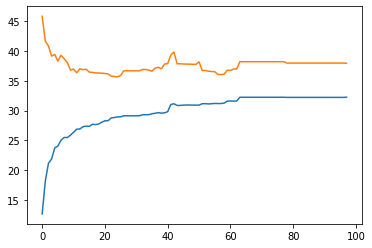

In \[250\]:

    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor()
    modeller(rfr)

Out\[250\]:

    (11.91, 35.82)

In \[251\]:

    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=30,max_depth=2)
    modeller(rfr)

Out\[251\]:

    (31.06, 36.24)

In \[252\]:

    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=30,max_depth=3)
    modeller(rfr)

Out\[252\]:

    (28.13, 35.46)

In \[253\]:

    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(n_estimators=30,max_depth=4)
    modeller(rfr)

Out\[253\]:

    (25.39, 34.31)

In \[254\]:

    from sklearn.ensemble import AdaBoostRegressor
    abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=30)
    modeller(abr)

Out\[254\]:

    (31.35, 36.99)

In \[255\]:

    from sklearn.ensemble import AdaBoostRegressor
    abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=40)
    modeller(abr)

Out\[255\]:

    (32.14, 35.82)

In \[256\]:

    from sklearn.ensemble import AdaBoostRegressor
    abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=50)
    modeller(abr)

Out\[256\]:

    (31.56, 36.47)

In \[257\]:

    from sklearn.neighbors import KNeighborsRegressor
    tr = []
    ts = []
    for i in range(2,100,1):
        from sklearn.neighbors import KNeighborsRegressor
        knr = KNeighborsRegressor(n_neighbors=i)
        t1,t2 = modeller(knr)
        tr.append(t1)
        ts.append(t2)

In \[258\]:

    import matplotlib.pyplot as plt
    plt.plot(tr)
    plt.plot(ts)

Out\[258\]:

    [<matplotlib.lines.Line2D at 0x11d394940>]

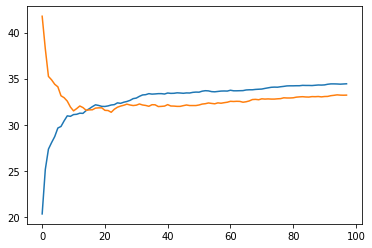

In \[259\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=17)
    modeller(knr)

Out\[259\]:

    (31.73, 31.61)

# Final Model<a href="#Final-Model" class="anchor-link">¶</a>

In \[260\]:

    knr = KNeighborsRegressor(n_neighbors=17)
    model = knr.fit(Xnew,Y)

# Prepare prediction set<a href="#Prepare-prediction-set" class="anchor-link">¶</a>

In \[261\]:

    X = tsd

    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.DataFrame(ss.transform(X[con]),columns=con)
    X2 = pd.get_dummies(X[cat])
    Xnew2 = X1.join(X2)

In \[262\]:

    len(Xnew.columns),len(Xnew2.columns)

Out\[262\]:

    (21, 21)

# Predictions<a href="#Predictions" class="anchor-link">¶</a>

In \[264\]:

    pred = model.predict(Xnew2)

In \[266\]:

    tsd['LoanAmount_Approved_ten']=pred

In \[267\]:

    tsd

Out\[267\]:

|     | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status | LoanAmount_Approved_ten |
|-----|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------------|----------------|---------------|-------------|-------------------------|
| 0   | Male   | Yes     | 0          | Graduate     | No            | 5720            | 0                 | 360.0            | 1.0            | Urban         | Y           | 136.224960              |
| 1   | Male   | Yes     | 1          | Graduate     | No            | 3076            | 1500              | 360.0            | 1.0            | Urban         | Y           | 111.294118              |
| 2   | Male   | Yes     | 2          | Graduate     | No            | 5000            | 1800              | 360.0            | 1.0            | Urban         | Y           | 142.411765              |
| 3   | Male   | Yes     | 2          | Graduate     | No            | 2340            | 2546              | 360.0            | 1.0            | Urban         | Y           | 124.847774              |
| 4   | Male   | No      | 0          | Not Graduate | No            | 3276            | 0                 | 360.0            | 1.0            | Urban         | N           | 98.989666               |
| 5   | Male   | Yes     | 0          | Not Graduate | Yes           | 2165            | 3422              | 360.0            | 1.0            | Urban         | Y           | 132.470588              |
| 6   | Female | No      | 1          | Not Graduate | No            | 2226            | 0                 | 360.0            | 1.0            | Semiurban     | Y           | 95.235294               |
| 7   | Male   | Yes     | 2          | Not Graduate | No            | 3881            | 0                 | 360.0            | 0.0            | Rural         | N           | 127.224960              |
| 8   | Male   | Yes     | 2          | Graduate     | No            | 13633           | 0                 | 240.0            | 1.0            | Urban         | Y           | 166.930843              |
| 9   | Male   | No      | 0          | Not Graduate | No            | 2400            | 2400              | 360.0            | 1.0            | Semiurban     | Y           | 112.882353              |
| 10  | Male   | No      | 0          | Not Graduate | No            | 3091            | 0                 | 360.0            | 1.0            | Urban         | N           | 96.107313               |
| 11  | Male   | Yes     | 1          | Graduate     | No            | 2185            | 1516              | 360.0            | 1.0            | Semiurban     | Y           | 108.117647              |
| 12  | Male   | No      | 3+         | Graduate     | No            | 4166            | 0                 | 180.0            | 1.0            | Urban         | Y           | 101.259539              |
| 13  | Male   | Yes     | 2          | Graduate     | No            | 12173           | 0                 | 360.0            | 0.0            | Semiurban     | N           | 160.283784              |
| 14  | Female | No      | 0          | Graduate     | No            | 4666            | 0                 | 360.0            | 1.0            | Semiurban     | Y           | 116.705882              |
| 15  | Male   | No      | 1          | Graduate     | No            | 5667            | 0                 | 360.0            | 1.0            | Urban         | Y           | 127.259539              |
| 16  | Male   | Yes     | 2          | Graduate     | No            | 4583            | 2916              | 360.0            | 1.0            | Urban         | Y           | 146.941176              |
| 17  | Male   | Yes     | 3+         | Graduate     | No            | 3786            | 333               | 360.0            | 1.0            | Semiurban     | Y           | 106.352941              |
| 18  | Male   | Yes     | 0          | Graduate     | No            | 9226            | 7916              | 360.0            | 1.0            | Urban         | Y           | 233.941176              |
| 19  | Male   | No      | 0          | Graduate     | No            | 1300            | 3470              | 180.0            | 1.0            | Semiurban     | N           | 107.847774              |
| 20  | Male   | Yes     | 1          | Not Graduate | No            | 1888            | 1620              | 360.0            | 1.0            | Urban         | Y           | 118.141892              |
| 21  | Female | No      | 3+         | Not Graduate | No            | 2083            | 0                 | 180.0            | 1.0            | Urban         | Y           | 106.200715              |
| 22  | Male   | No      | 0          | Graduate     | No            | 3909            | 0                 | 360.0            | 1.0            | Urban         | N           | 105.166137              |
| 23  | Female | No      | 0          | Not Graduate | No            | 3765            | 0                 | 360.0            | 1.0            | Urban         | Y           | 89.529412               |
| 24  | Male   | Yes     | 0          | Graduate     | No            | 5400            | 4380              | 360.0            | 1.0            | Urban         | Y           | 189.612480              |
| 25  | Male   | No      | 0          | Graduate     | No            | 0               | 24000             | 360.0            | 0.0            | Rural         | Y           | 205.764706              |
| 26  | Male   | Yes     | 2          | Graduate     | No            | 4363            | 1250              | 360.0            | 1.0            | Urban         | Y           | 136.529412              |
| 27  | Male   | Yes     | 0          | Graduate     | No            | 7500            | 3750              | 360.0            | 1.0            | Urban         | Y           | 198.141892              |
| 28  | Male   | Yes     | 0          | Graduate     | No            | 3772            | 833               | 360.0            | 1.0            | Semiurban     | Y           | 119.058824              |
| 29  | Male   | No      | 0          | Graduate     | No            | 2942            | 2382              | 180.0            | 1.0            | Urban         | Y           | 101.788951              |
| ... | ...    | ...     | ...        | ...          | ...           | ...             | ...               | ...              | ...            | ...           | ...         | ...                     |
| 337 | Male   | Yes     | 0          | Graduate     | No            | 2292            | 1558              | 360.0            | 1.0            | Urban         | Y           | 118.401431              |
| 338 | Male   | Yes     | 1          | Graduate     | Yes           | 2360            | 3355              | 240.0            | 1.0            | Rural         | Y           | 125.647059              |
| 339 | Female | No      | 0          | Graduate     | No            | 4333            | 2333              | 360.0            | 0.0            | Rural         | N           | 116.647059              |
| 340 | Male   | Yes     | 0          | Graduate     | Yes           | 2623            | 4831              | 180.0            | 1.0            | Semiurban     | N           | 129.906598              |
| 341 | Male   | No      | 0          | Graduate     | Yes           | 3972            | 4275              | 360.0            | 1.0            | Rural         | Y           | 143.294118              |
| 342 | Male   | Yes     | 3+         | Not Graduate | No            | 3522            | 0                 | 180.0            | 1.0            | Rural         | Y           | 99.494833               |
| 343 | Male   | Yes     | 1          | Graduate     | No            | 4700            | 0                 | 360.0            | 1.0            | Urban         | Y           | 126.352941              |
| 344 | Male   | No      | 0          | Graduate     | No            | 6858            | 0                 | 360.0            | 1.0            | Rural         | Y           | 146.695548              |
| 345 | Male   | Yes     | 3+         | Graduate     | No            | 8334            | 0                 | 360.0            | 1.0            | Urban         | Y           | 156.647059              |
| 346 | Male   | Yes     | 0          | Graduate     | No            | 3391            | 1966              | 360.0            | 0.0            | Rural         | N           | 129.024245              |
| 347 | Male   | No      | 0          | Not Graduate | No            | 2868            | 0                 | 360.0            | 1.0            | Urban         | N           | 86.166137               |
| 348 | Male   | Yes     | 2          | Not Graduate | No            | 3418            | 1380              | 360.0            | 1.0            | Urban         | Y           | 120.788951              |
| 349 | Male   | Yes     | 0          | Graduate     | Yes           | 2500            | 296               | 300.0            | 1.0            | Rural         | Y           | 118.176471              |
| 350 | Male   | Yes     | 2          | Graduate     | No            | 8667            | 0                 | 360.0            | 1.0            | Rural         | Y           | 174.058824              |
| 351 | Male   | No      | 0          | Graduate     | No            | 2283            | 15000             | 360.0            | 1.0            | Rural         | Y           | 203.294118              |
| 352 | Male   | Yes     | 0          | Graduate     | No            | 5817            | 910               | 360.0            | 1.0            | Urban         | Y           | 118.695548              |
| 353 | Male   | Yes     | 0          | Graduate     | No            | 5119            | 3769              | 360.0            | 1.0            | Rural         | Y           | 151.671304              |
| 354 | Male   | Yes     | 3+         | Not Graduate | No            | 5316            | 187               | 180.0            | 0.0            | Semiurban     | N           | 114.553657              |
| 355 | Male   | Yes     | 3+         | Graduate     | No            | 7603            | 1213              | 360.0            | 1.0            | Urban         | Y           | 148.529412              |
| 356 | Male   | Yes     | 1          | Graduate     | No            | 3791            | 1936              | 360.0            | 1.0            | Urban         | Y           | 122.470588              |
| 357 | Male   | No      | 0          | Graduate     | No            | 2500            | 0                 | 360.0            | 1.0            | Urban         | Y           | 89.965421               |
| 358 | Male   | Yes     | 2          | Not Graduate | No            | 3132            | 0                 | 360.0            | 1.0            | Rural         | N           | 129.141892              |
| 359 | Male   | No      | 0          | Graduate     | No            | 4000            | 2667              | 360.0            | 1.0            | Semiurban     | Y           | 147.294118              |
| 360 | Female | Yes     | 0          | Graduate     | No            | 8550            | 4255              | 360.0            | 1.0            | Urban         | Y           | 194.553657              |
| 361 | Male   | Yes     | 1          | Graduate     | No            | 2269            | 2167              | 360.0            | 1.0            | Semiurban     | Y           | 125.470588              |
| 362 | Male   | Yes     | 3+         | Not Graduate | Yes           | 4009            | 1777              | 360.0            | 1.0            | Urban         | Y           | 123.823529              |
| 363 | Male   | Yes     | 0          | Graduate     | No            | 4158            | 709               | 360.0            | 1.0            | Urban         | Y           | 117.930843              |
| 364 | Male   | No      | 0          | Graduate     | No            | 3250            | 1993              | 360.0            | 1.0            | Semiurban     | Y           | 108.764706              |
| 365 | Male   | Yes     | 0          | Graduate     | No            | 5000            | 2393              | 360.0            | 1.0            | Rural         | N           | 153.588235              |
| 366 | Male   | No      | 0          | Graduate     | Yes           | 9200            | 0                 | 180.0            | 1.0            | Rural         | Y           | 133.494833              |

367 rows × 12 columns

# Problem 2.2<a href="#Problem-2.2" class="anchor-link">¶</a>

In \[272\]:

    Q = A[(A.Loan_Status=="N")]
    Q.index = range(0,73)

In \[274\]:

    Q['Duration']=Q.Loan_Amount_Term/12

In \[312\]:

    R = Q[Q.Duration<=20]
    R1 = R.drop(labels=["Duration"],axis=1)

In \[313\]:

    A = trd[trd.Loan_Status=="Y"]
    A.index = range(0,398,1)
    X = A.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)
    A['Duration']=A.Loan_Amount_Term/12
    Y = A[["Duration"]]

In \[314\]:

    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    ss = StandardScaler()
    X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
    X2 = pd.get_dummies(X[cat])
    Xnew2 = X1.join(X2)

In \[315\]:

    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew2,Y,test_size=0.2,random_state=21)

# Model<a href="#Model" class="anchor-link">¶</a>

In \[316\]:

    from sklearn.neighbors import KNeighborsRegressor
    tr = []
    ts = []
    for i in range(2,100,1):
        from sklearn.neighbors import KNeighborsRegressor
        knr = KNeighborsRegressor(n_neighbors=i)
        t1,t2 = modeller(knr)
        tr.append(t1)
        ts.append(t2)

In \[317\]:

    plt.plot(tr)
    plt.plot(ts)

Out\[317\]:

    [<matplotlib.lines.Line2D at 0x11d1643c8>]

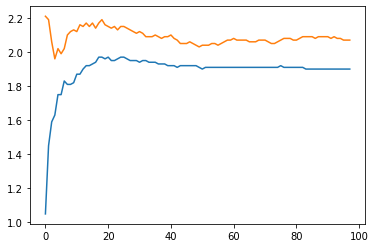

In \[318\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=2)
    modeller(knr)

Out\[318\]:

    (1.05, 2.21)

In \[319\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=3)
    modeller(knr)

Out\[319\]:

    (1.45, 2.19)

In \[320\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=4)
    modeller(knr)

Out\[320\]:

    (1.59, 2.06)

In \[321\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=5)
    modeller(knr)

Out\[321\]:

    (1.63, 1.96)

In \[322\]:

    from sklearn.neighbors import KNeighborsRegressor
    knr = KNeighborsRegressor(n_neighbors=6)
    modeller(knr)

Out\[322\]:

    (1.75, 2.02)

# Final Model<a href="#Final-Model" class="anchor-link">¶</a>

In \[323\]:

    knr = KNeighborsRegressor(n_neighbors=5)
    model = knr.fit(Xnew2,Y)

# Data<a href="#Data" class="anchor-link">¶</a>

In \[327\]:

    R1.index=range(0,7)

In \[334\]:

    X = R1.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

    cat = []
    con = []
    for i in X.columns:
        if(X[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)

    X1 = pd.DataFrame(ss.transform(X[con]),columns=con)
    X2 = pd.get_dummies(X[cat])
    Xnew21 = X1.join(X2)

In \[336\]:

    #Xnew21[Xnew2.columns]

In \[337\]:

    W = ['Dependents_1', 'Property_Area_Rural', 'Gender_Female', 'Dependents_2']
    for i in W:
        Xnew21[i]=0

# Predcitions<a href="#Predcitions" class="anchor-link">¶</a>

In \[342\]:

    pred = model.predict(Xnew21)

In \[343\]:

    pred

Out\[343\]:

    array([[30.],
           [27.],
           [27.],
           [27.],
           [27.],
           [29.],
           [27.]])

In \[345\]:

    R['New_Duration']=pred

In \[346\]:

    R

Out\[346\]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status | Duration | New_Duration |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|----------|--------------|
| 4   | LP001115 | Male   | No      | 0          | Graduate     | No            | 1300            | 3470              | 100.0      | 180.0            | 1.0            | Semiurban     | N           | 15.0     | 30.0         |
| 16  | LP001450 | Male   | Yes     | 0          | Graduate     | No            | 4456            | 0                 | 131.0      | 180.0            | 0.0            | Semiurban     | N           | 15.0     | 27.0         |
| 37  | LP001979 | Male   | No      | 0          | Graduate     | No            | 3017            | 2845              | 159.0      | 180.0            | 0.0            | Urban         | N           | 15.0     | 27.0         |
| 52  | LP002355 | Male   | Yes     | 0          | Graduate     | No            | 3186            | 3145              | 150.0      | 180.0            | 0.0            | Semiurban     | N           | 15.0     | 27.0         |
| 65  | LP002802 | Male   | No      | 0          | Graduate     | No            | 2875            | 2416              | 95.0       | 6.0              | 0.0            | Semiurban     | N           | 0.5      | 27.0         |
| 67  | LP002860 | Male   | Yes     | 0          | Graduate     | Yes           | 2623            | 4831              | 122.0      | 180.0            | 1.0            | Semiurban     | N           | 15.0     | 29.0         |
| 70  | LP002921 | Male   | Yes     | 3+         | Not Graduate | No            | 5316            | 187               | 158.0      | 180.0            | 0.0            | Semiurban     | N           | 15.0     | 27.0         |

In \[ \]: